In [1]:
from parts.utils.notebook_setup import *

Loading ARTS API from: /home/simonpf/build/arts_fast/src/libarts_api.so


## Atmosphere

In [2]:
%load_ext autoreload
%autoreload 2
from parts.models import StandardAtmosphere
atmosphere = StandardAtmosphere()

## Sensors

In [50]:
from parts.sensor import ICI, MWI

ici = ICI(stokes_dimension = 1, channel_indices = [1, 3, 5, 8, 10])
ici.sensor_line_of_sight = np.array([180.0])
ici.sensor_position      = np.array([500e3])

mwi = MWI(stokes_dimension = 1, channel_indices = [2, 7, 9, 12, 15])
mwi.sensor_line_of_sight = np.array([180.0])
mwi.sensor_position      = np.array([500e3])

sensors = [ici, mwi]

## The ice cloud

In [51]:
atmosphere.scatterers

In [52]:
from parts.scattering.psd.binned import BinnedPSD
from parts.scattering            import ScatteringSpecies
from tests.data                  import scattering_data, scattering_meta

x   = np.logspace(-5, -2, 21)
ice = ScatteringSpecies("ice", BinnedPSD(np.logspace(-5, -2, 21)),
                        scattering_data = scattering_data,
                        scattering_meta_data = scattering_meta)
atmosphere.add_scatterer(ice)

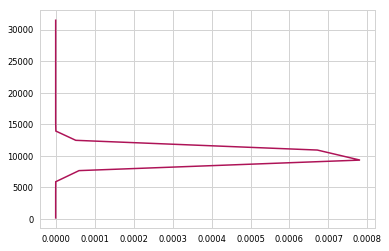

In [53]:
from parts.data.atmosphere import Tropical

z = Tropical().get_altitude()
iwc = 1e-3 * np.exp(- 0.5 * ((z - 10e3) / 1e3) ** 2)
plt.plot(iwc, z)

In [54]:
from parts.data.atmosphere import Tropical
from parts.scattering.psd  import D14MN

class BinnedDataProvider(Tropical):
    def __init__(self, x, md):
        super().__init__()
        t  = self.get_temperature()
        n0 = 1e9 * np.ones(t.shape)
        self.psd = D14MN(mass_density = md, 
                        intercept_parameter = n0,
                        alpha = -1.0, beta = 3.0, rho = 917.0)
        self.y = self.psd.evaluate(x).data
        
        def make_getter(i):
            def get_bin(j = -1):
                x = self.y[:, i]
                if i == j:
                    return x * 1.1
                else:
                    return x
            return get_bin
            
        for i in range(x.size):
            name = "get_ice_bin_" + str(i)
            self.__dict__[name] = make_getter(i)
            

## Simulation

In [55]:
from parts.simulation import ArtsSimulation
simulation = ArtsSimulation(atmosphere = atmosphere,
                            sensors = sensors)
simulation.data_provider = BinnedDataProvider(x, iwc)

In [56]:
simulation.setup()
simulation.run()
y0_ici = np.copy(ici.y)
y0_mwi = np.copy(mwi.y)

ARTS[93833741264672]: Executing /home/simonpf/src/arts/controlfiles/general/general.arts
ARTS[93833741264672]: {
ARTS[93833741264672]: - verbosityInit
ARTS[93833741264672]: - scat_speciesSet
ARTS[93833741264672]: - MatrixSet
ARTS[93833741264672]: - Tensor4SetConstant
ARTS[93833741264672]: - ArrayOfStringSet
ARTS[93833741264672]: - Touch
ARTS[93833741264672]: - Tensor3SetConstant
ARTS[93833741264672]: - ArrayOfStringSet
ARTS[93833741264672]: - MatrixSet
ARTS[93833741264672]: - NumericSet
ARTS[93833741264672]: - ArrayOfStringSet
ARTS[93833741264672]: - Tensor3SetConstant
ARTS[93833741264672]: - Tensor3SetConstant
ARTS[93833741264672]: - Tensor3SetConstant
ARTS[93833741264672]: - Tensor3SetConstant
ARTS[93833741264672]: - Tensor3SetConstant
ARTS[93833741264672]: - Tensor3SetConstant
ARTS[93833741264672]: - IndexSet
ARTS[93833741264672]: - IndexSet
ARTS[93833741264672]: - IndexSet
ARTS[93833741264672]: - IndexSet
ARTS[93833741264672]: - FlagOff
ARTS[93833741264672]: - output_file_formatSet

ARTS[93833741264672]: - ReadXML

ARTS[93833741264672]: - ReadXML

ARTS[93833741264672]: - Append

ARTS[93833741264672]: - Append

ARTS[93833741264672]: - Delete

ARTS[93833741264672]: - Delete

ARTS[93833741264672]: - Append

ARTS[93833741264672]: - Append

ARTS[93833741264672]: - Append

ARTS[93833741264672]: - ReadXML

ARTS[93833741264672]: - ReadXML

ARTS[93833741264672]: - Append

ARTS[93833741264672]: - Append

ARTS[93833741264672]: - Delete

ARTS[93833741264672]: - Delete

ARTS[93833741264672]: - Append

ARTS[93833741264672]: - Append

ARTS[93833741264672]: - Append

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - TessemNNReadAscii

ARTS[93833741264672]: - TessemNNReadAscii

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - scat_dataCalc

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - s

In [57]:
y1_ici = []
y1_mwi = []
for i in range(21):
    simulation.run(i)
    y1_ici += [np.copy(ici.y)]
    y1_mwi += [np.copy(mwi.y)]

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - cloudboxSetFullAtm

ARTS[93833741264672]: - cloudboxSetFullAtm

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - sensor_responseInit

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - sensor_checkedCalc

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - sensor_responseInit

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - RT4Calc

ARTS[93833741264672]: - yCalc

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - RT4Calc

ARTS[93833741264672]: - yCalcAppend

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - cloudboxSetFullAtm

ARTS[93833741264672]: - cloudboxSetFullAtm

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - sensor_responseInit

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - sensor_checkedCalc

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy


ARTS[93833741264672]: - RT4Calc

ARTS[93833741264672]: - yCalc

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - RT4Calc

ARTS[93833741264672]: - yCalcAppend

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - cloudboxSetFullAtm

ARTS[93833741264672]: - cloudboxSetFullAtm

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - sensor_responseInit

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - sensor_checkedCalc

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy


ARTS[93833741264672]: - RT4Calc

ARTS[93833741264672]: - yCalc

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - RT4Calc

ARTS[93833741264672]: - yCalcAppend

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - cloudboxSetFullAtm

ARTS[93833741264672]: - cloudboxSetFullAtm

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - sensor_responseInit

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - sensor_checkedCalc

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy


ARTS[93833741264672]: - RT4Calc

ARTS[93833741264672]: - yCalc

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - RT4Calc

ARTS[93833741264672]: - yCalcAppend

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - cloudboxSetFullAtm

ARTS[93833741264672]: - cloudboxSetFullAtm

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - sensor_responseInit

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - sensor_checkedCalc

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy


ARTS[93833741264672]: - RT4Calc

ARTS[93833741264672]: - yCalc

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - RT4Calc

ARTS[93833741264672]: - yCalcAppend

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - cloudboxSetFullAtm

ARTS[93833741264672]: - cloudboxSetFullAtm

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - sensor_responseInit

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - sensor_checkedCalc

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy

ARTS[93833741264672]: - Copy


In [59]:
y1_mwi = np.stack(y1_mwi)
y1_ici = np.stack(y1_ici)

In [60]:
y1_ici[10, :, 0]

array([246.91654911, 227.14955589, 168.91927197, 154.21536878,
       137.65148232])

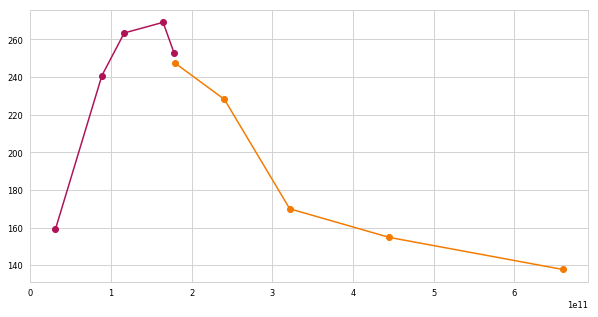

In [62]:
f, axs = plt.subplots(1, 1, figsize = (10, 5))

ax = axs

x  = mwi.f_grid
ax.plot(x, y0_mwi, marker = "o")

x  = ici.f_grid
ax.plot(x, y0_ici, marker = "o")

In [69]:
y1_mwi[:, i, 0].shape - y0

(21,)

In [70]:
x.shape

(5,)

In [76]:
bs

(0.9378700499807766, 0.9646289888504421, 0.990157631680123, 1.0)

In [79]:
bs

[(0.03137254901960784, 0.18823529411764706, 0.4196078431372549, 1.0),
 (0.03137254901960784, 0.18823529411764706, 0.4196078431372549, 1.0),
 (0.03137254901960784, 0.18823529411764706, 0.4196078431372549, 1.0),
 (0.03137254901960784, 0.18823529411764706, 0.4196078431372549, 1.0),
 (0.03137254901960784, 0.18823529411764706, 0.4196078431372549, 1.0)]

In [82]:
mwi.f_grid.size

5

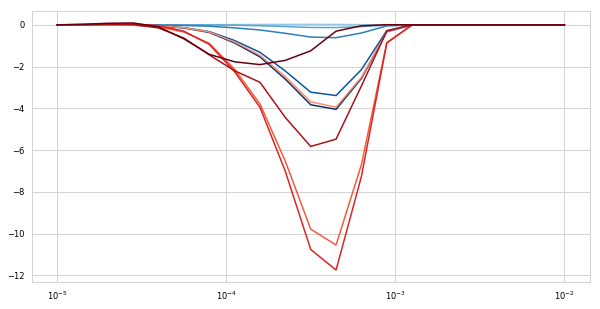

In [90]:
from matplotlib.cm import Reds, Blues

f, ax = plt.subplots(1, 1, figsize = (10, 5))
x   = np.logspace(-5, -2, 21)
bs = [Blues(100 + i * 40) for i in range(mwi.f_grid.size)]
for i, f in enumerate(mwi.f_grid):
    plt.plot(x, (y1_mwi[:, i, 0] - y0_mwi[i, 0]) * 10, c = bs[i])

rs = [Reds(100 + i * 40) for i in range(ici.f_grid.size)]
for i, f in enumerate(ici.f_grid):
    plt.plot(x, (y1_ici[:, i, 0] - y0_ici[i, 0]) * 10, c = rs[i])

rs = Reds(ici.f_grid.size * 2)

ax.set_xscale("log")

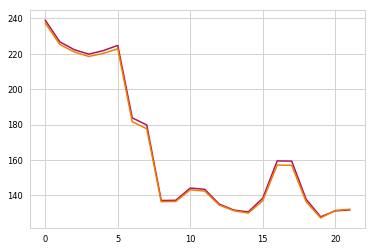

In [129]:
plt.plot(y0)
plt.plot(y1[7, :, 0])

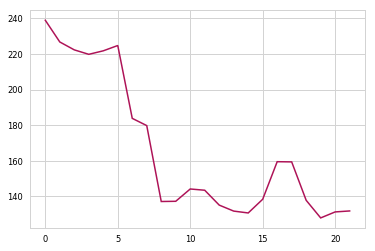

In [87]:
import matplotlib.pyplot as plt
plt.plot(ici.y)

In [88]:
ws = simulation.workspace        
ws.pnd_agenda_input.value

Exception: WorkspaceVariable pnd_agenda_input is uninitialized.

In [91]:
z   = Tropical().get_altitude()
iwc = 1e-4 * np.ones(z.shape)
iwc[np.logical_or(z < 5e-3, z > 15e3)] = 0.0
dp = BinnedDataProvider(np.logspace(-5, -2, 101), iwc)


/home/simonpf/src/parts/parts/scattering/psd/d14.py:116: RuntimeWarning: divide by zero encountered in true_divide
  x = x / dm


In [92]:
np.logical_or(z < 5e3, z > 15e3)

array([ True,  True,  True, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

(0.001, 10000000000.0)

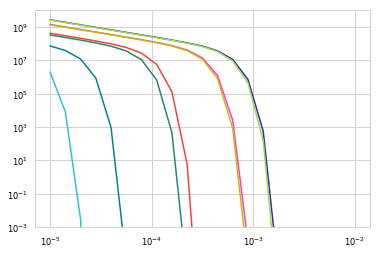

In [93]:
plt.plot(x, simulation.data_provider.y.T)
plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-3, 1e10])

In [94]:
dp.y.data.shape

(21, 101)

In [90]:
dp.get_ice_bin_0()

array([1.53718638e+09, 1.53718638e+09, 1.53718638e+09, 1.53718638e+09,
       1.53718638e+09, 1.53718638e+09, 1.53718638e+09, 1.53718638e+09,
       1.53718638e+09, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])